# Iris Flowers


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
s_dict={}
df=pd.read_csv("iris.csv")
df.index=df.index+1
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


# Plotting

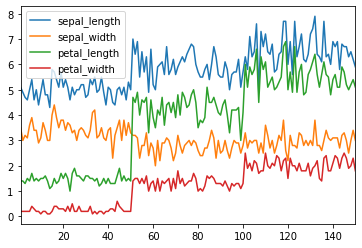

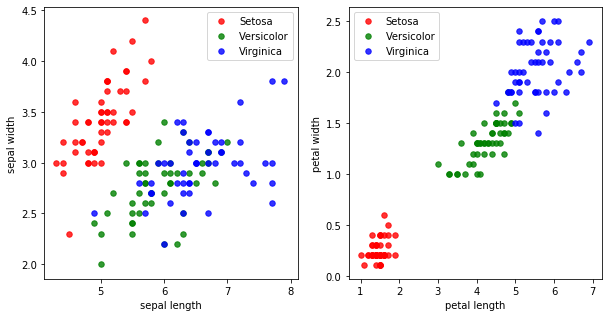

In [3]:
df.plot()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

seto=df.where(df['species']=='setosa')
versi=df.where(df['species']=='versicolor')
vir=df.where(df['species']=='virginica')

ax1.scatter(seto['sepal_length'],seto['sepal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax1.scatter(versi['sepal_length'],versi['sepal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax1.scatter(vir['sepal_length'],vir['sepal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend()


ax2.scatter(seto['petal_length'],seto['petal_width'],c='r',label='Setosa',alpha=0.8,s=30)
ax2.scatter(versi['petal_length'],versi['petal_width'],c='g',label='Versicolor',alpha=0.8,s=30)
ax2.scatter(vir['petal_length'],vir['petal_width'],c='b',label='Virginica',alpha=0.8,s=30)
ax2.set_xlabel('petal length')
ax2.set_ylabel('petal width')
ax2.legend()
plt.show()


# Train & Test

In [4]:
cols=df.columns
X=df[cols[:-1]]
y=df[cols[-1]]
print(X.head(),'\n',y.head())

   sepal_length  sepal_width  petal_length  petal_width
1           5.1          3.5           1.4          0.2
2           4.9          3.0           1.4          0.2
3           4.7          3.2           1.3          0.2
4           4.6          3.1           1.5          0.2
5           5.0          3.6           1.4          0.2 
 1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: species, dtype: object


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y) #use random_state=0 parameter if need to reproduce
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
110,7.2,3.6,6.1,2.5
50,5.0,3.3,1.4,0.2
4,4.6,3.1,1.5,0.2
14,4.3,3.0,1.1,0.1
83,5.8,2.7,3.9,1.2


# Scaling

In [6]:
X_train2=MinMaxScaler().fit_transform(X_train)
X_test2=MinMaxScaler().fit_transform(X_test)

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

Using non scaled dataset

In [9]:
lr=LogisticRegression(solver='lbfgs').fit(X_train, y_train)
s_dict['Logistic Regression']=lr.score(X_test,y_test)
print(s_dict['Logistic Regression'])
#plt.figure()
#lr_pred=lr.predict(X_test)
#plt.plot(lr_pred,'x')
#plt.plot(y_test, '-',color='red')

0.8947368421052632


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Using scaled datasets

In [10]:
lr=LogisticRegression(solver='lbfgs').fit(X_train2, y_train)
s_dict['Logistic Regression(scaled)']=lr.score(X_test2,y_test)
print(s_dict['Logistic Regression(scaled)'])

0.8421052631578947


D:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

No need of scaling here

In [12]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
s_dict['Decision Tree']=dt.score(X_test,y_test)
print(s_dict['Decision Tree'])

0.868421052631579


# Support Vector Machine

In [13]:
from sklearn.svm import SVC

Using non scaled dataset

In [14]:
sv=SVC().fit(X_train,y_train)
s_dict['SVM']=sv.score(X_test,y_test)
print(s_dict['SVM'])

0.9736842105263158


D:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Using scaled dataset

In [15]:
sv=SVC().fit(X_train2,y_train)
s_dict['SVM (scaled)']=sv.score(X_test2,y_test)
print(s_dict['SVM (scaled)'])

0.9473684210526315


D:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
mnb=MultinomialNB().fit(X_train,y_train)
s_dict['Naive Bayes']=mnb.score(X_test,y_test)
print(s_dict['Naive Bayes'])

0.5526315789473685


# k Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neighbors=[x for x in range(15,50)]

Using non scaled datasets

In [20]:
maxi,idm=0,0
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    #print(knn.score(X_test,y_test),'    ',n)
    if knn.score(X_test,y_test)>maxi:
        maxi=knn.score(X_test,y_test)
        idm=n
s_dict['kNN']=maxi
print(s_dict['kNN'], "for ",idm,' neighbors')

0.9736842105263158 for  15  neighbors


Using scaled datasets

In [21]:
maxm,idmi=0,0
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train2,y_train)
    if knn.score(X_test2,y_test)>maxm:
        maxm=knn.score(X_test2,y_test)
        idmi=n
s_dict['kNN(scaled)']=maxm
print(s_dict['kNN(scaled)'], 'for ',idmi,' neighbors')

0.9473684210526315 for  15  neighbors


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf=RandomForestClassifier(random_state=0).fit(X_train,y_train)
s_dict['Random Forest']=rf.score(X_test,y_test)
print(s_dict['Random Forest'])

0.9473684210526315


D:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Score Graph


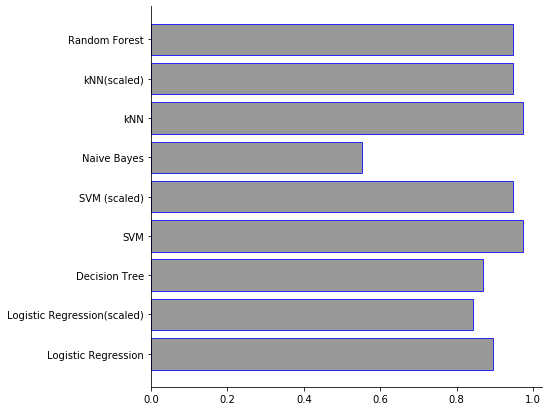

In [24]:
plt.figure(figsize=(7,7))
plt.barh(range(len(s_dict)), list(s_dict.values()), align='center',color='grey',alpha=0.8,edgecolor='blue')
plt.yticks(range(len(s_dict)), list(s_dict.keys()))
sb.despine(top=True,right=True)
plt.show()